## Exercício MiniBoss - Coop

### Realize a Análise Exploratória: Utilize funções para verificar a estrutura do conjunto de dados (ex: head(), info()). Descreva brevemente o que cada coluna significa.
### Limpeza dos Dados: Identifique valores ausentes em cada coluna.
### Responda: Quais colunas tem valores ausentes? Qual percentual de valores ausentes para cada coluna? (cof cof df.isna().sum() / len(df) desculpe tossi durante a escrita).
### Gere um gráfico heatmap no Seaborn para visualizar os valores ausentes. Eles seguem algum padrão? Qual melhor maneira de lidar com esses dados ausentes e pq?

### Tratamento de Dados Inválidos:
### Verifique se há Outliers e os dados estatísticos da coluna “children” e “days_employed” trate-os adequadamente. Qual melhor maneira delidar com os outliers dessa coluna e pq? <br><br>Remova dados duplicados:
### Verifique se há dados duplicados, se tiver remova eles e reset o index.
### Existe uma correlação entre ter filhos e pagar o aluguel em dia? Existe uma correlação entre status familiar e pagamento em dia

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv("credit_scoring.csv")

In [52]:
display(df)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [54]:
valores_nulos = df.isnull().sum()

In [55]:
porcentual_valores_ausentes = df.isnull().sum() / len(df)
porcentual_valores_ausentes

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

### Gere um gráfico heatmap no Seaborn para visualizar os valores ausentes. Eles seguem algum padrão? Qual melhor maneira de lidar com esses dados ausentes e pq?

### R= A melhor forma de lidar com este dados seria remove-los, pois como podemos ver no HeatMap os mesmos valores nulos que estão na coluna days_employed estão na coluna total_income, demostrando que estes dados não foram coletados, ou simplesmente a pessoal não estava empregada e não tem como receber dinheiro sem ter emprego, um dos principais requisitos para opter um credito é estar empregado.

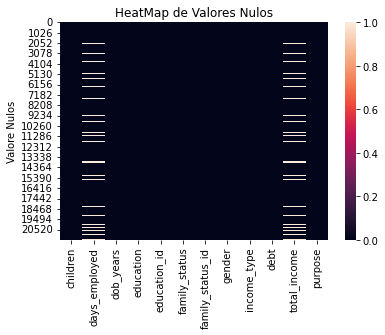

In [56]:
sns.heatmap(df.isnull())
plt.ylabel("Valore Nulos")
plt.title("HeatMap de Valores Nulos")

plt.show()

In [57]:
df_new = df.dropna()
df_new.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,1.935100e+04
mean,0.537388,63046.497661,43.255336,0.819079,0.972249,0.081184,1.674223e+05
std,1.371408,140827.311974,12.579170,0.550104,1.420596,0.273125,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [58]:
df = df[df["days_employed"] >= 0]
df = df[df["children"] <= 5]
df["days_employed"].median()

365249.34634489036

In [59]:
q1 = df['days_employed'].quantile(0.25)
q3 = df['days_employed'].quantile(0.75)
iqr = q3 - q1

df_new = df[(df['days_employed'] >= q1 - 1.5*iqr) & (df_new['days_employed'] <= q3 + 1.5*iqr)]
df_new = df_new[df_new["children"] < 6]
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

/tmp/ipykernel_62460/627561167.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



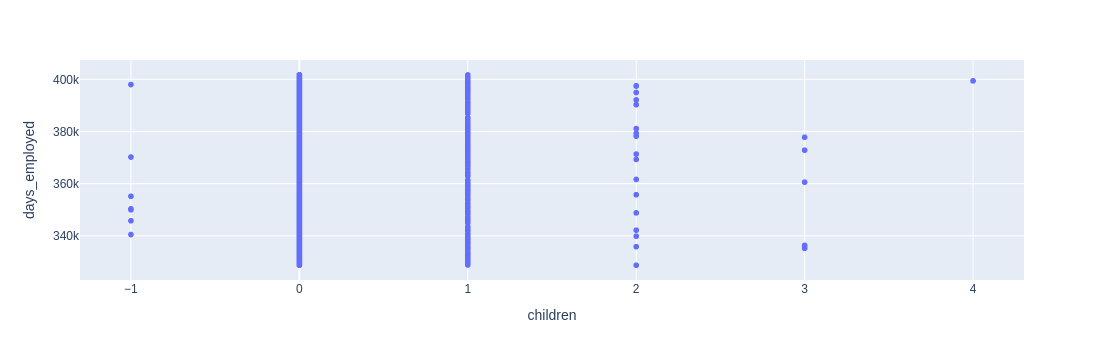

In [69]:
px.scatter(df, x="children", y="days_employed")

In [61]:
df.duplicated().sum()

0

In [62]:
df[['debt', 'children']].corr().iloc[:,1]

debt        0.011906
children    1.000000
Name: children, dtype: float64

In [63]:
correlation_matrix1 = df[['debt', 'family_status_id']].corr()

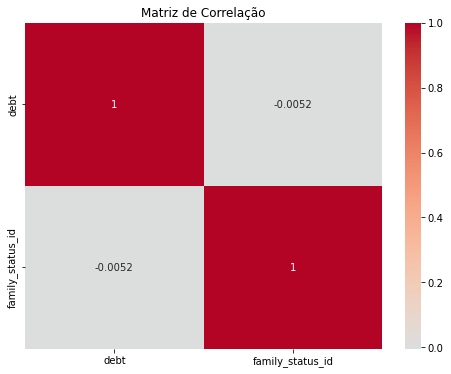

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação")
plt.show()

In [65]:
correlation_matrix2 = df[['debt', 'children']].corr()

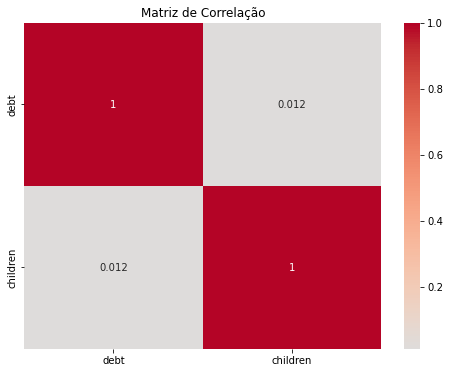

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação")
plt.show()